In [1]:
# Load Libraries
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import make_blobs
from matplotlib import pyplot

In [2]:
# prepare train and test dataset
def prepare_data():
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
    # one hot encode output variable
    y = to_categorical(y)
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy


In [5]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, n_batch):
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200,
    verbose=0, batch_size=n_batch)
    # plot learning curves
    pyplot.plot(history.history['accuracy'], label='train')
    pyplot.plot(history.history['val_accuracy'], label='test')
    pyplot.title('batch='+str(n_batch), pad=-40)


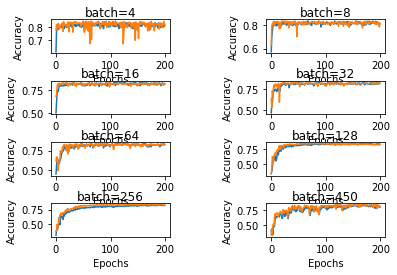

In [9]:
# prepare dataset
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different batch sizes
batch_sizes = [4, 8, 16, 32, 64, 128, 256, 450]
for i in range(len(batch_sizes)):
    # determine the plot number
    plot_no = 420 + (i+1)
    pyplot.subplot(plot_no)
    pyplot.title("Batch Sizes vs Accuracy")
    pyplot.xlabel("Epochs")
    pyplot.ylabel("Accuracy")
    pyplot.subplots_adjust(wspace = 0.8, hspace = 0.8)
    # fit model and plot learning curves for a batch size
    fit_model(trainX, trainy, testX, testy, batch_sizes[i])

pyplot.show()

In [ ]:
!jupyter nbconvert --to script batch_size_accuracy_classification.ipynb